In [2]:
import pandas as pd
from collections import Counter

# Load the dataset
file_path = "/content/Dataset .csv"
df = pd.read_csv(file_path)

# Drop rows where Cuisines is NaN
cuisine_data = df['Cuisines'].dropna()

# Split multiple cuisines in each entry and flatten the list
all_cuisines = [cuisine.strip() for entry in cuisine_data for cuisine in entry.split(',')]

# Count the frequency of each cuisine
cuisine_counts = Counter(all_cuisines)

# Get the top 3 most common cuisines
top_3_cuisines = cuisine_counts.most_common(3)

# Total number of restaurants
total_restaurants = len(df)

# Calculate the percentage of restaurants for each top cuisine
top_3_percentages = [(cuisine, count, round((count / total_restaurants) * 100, 2)) for cuisine, count in top_3_cuisines]

# Print results
for cuisine, count, percentage in top_3_percentages:
    print(f"{cuisine}: {count} restaurants ({percentage}%)")


North Indian: 3960 restaurants (41.46%)
Chinese: 2735 restaurants (28.64%)
Fast Food: 1986 restaurants (20.79%)


In [3]:
# 1. Identify the city with the highest number of restaurants
city_counts = df['City'].value_counts()
city_with_most_restaurants = city_counts.idxmax()
city_most_restaurant_count = city_counts.max()

print(f"City with the most restaurants: {city_with_most_restaurants} ({city_most_restaurant_count} restaurants)")

# 2. Calculate the average rating for restaurants in each city
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# 3. Determine the city with the highest average rating
city_highest_avg_rating = average_rating_by_city.idxmax()
highest_avg_rating = average_rating_by_city.max()

print(f"City with the highest average rating: {city_highest_avg_rating} (Average Rating: {highest_avg_rating})")


City with the most restaurants: New Delhi (5473 restaurants)
City with the highest average rating: Inner City (Average Rating: 4.9)


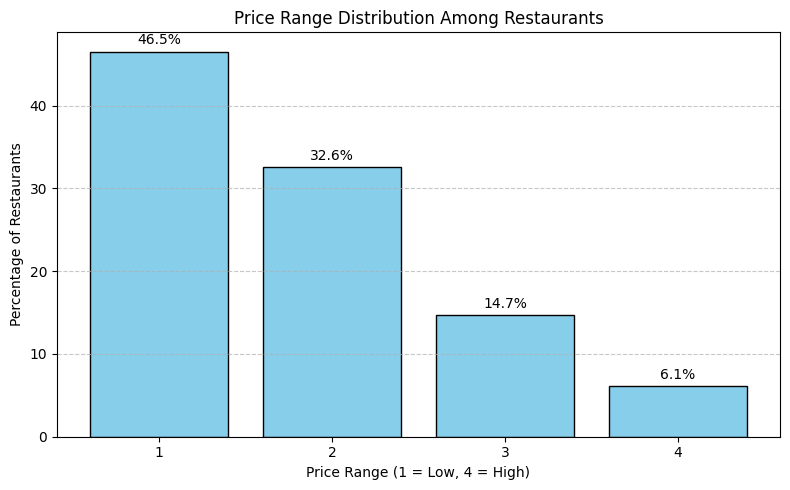

Percentage of Restaurants in Each Price Range:
Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of restaurants in each price range
price_range_counts = df['Price range'].value_counts().sort_index()

# Calculate the percentage of restaurants in each price range
price_range_percentages = (price_range_counts / len(df)) * 100

# Plotting the distribution
plt.figure(figsize=(8, 5))
bars = plt.bar(price_range_counts.index.astype(str), price_range_percentages, color='skyblue', edgecolor='black')
plt.title('Price Range Distribution Among Restaurants')
plt.xlabel('Price Range (1 = Low, 4 = High)')
plt.ylabel('Percentage of Restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate percentages on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the percentages
print("Percentage of Restaurants in Each Price Range:")
print(price_range_percentages.round(2))


In [5]:
# Step 1: Calculate the percentage of restaurants offering online delivery
online_delivery_counts = df['Has Online delivery'].value_counts()
total_restaurants = len(df)
online_delivery_percentage = (online_delivery_counts.get("Yes", 0) / total_restaurants) * 100

print(f"Percentage of restaurants with online delivery: {online_delivery_percentage:.2f}%")

# Step 2: Compare average ratings
# Convert column to consistent boolean type
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': True, 'No': False})

# Group by delivery option and compute average rating
avg_ratings_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()

print("\nAverage Ratings:")
print(f"With Online Delivery: {avg_ratings_delivery[True]:.2f}")
print(f"Without Online Delivery: {avg_ratings_delivery[False]:.2f}")


Percentage of restaurants with online delivery: 25.66%

Average Ratings:
With Online Delivery: 3.25
Without Online Delivery: 2.47


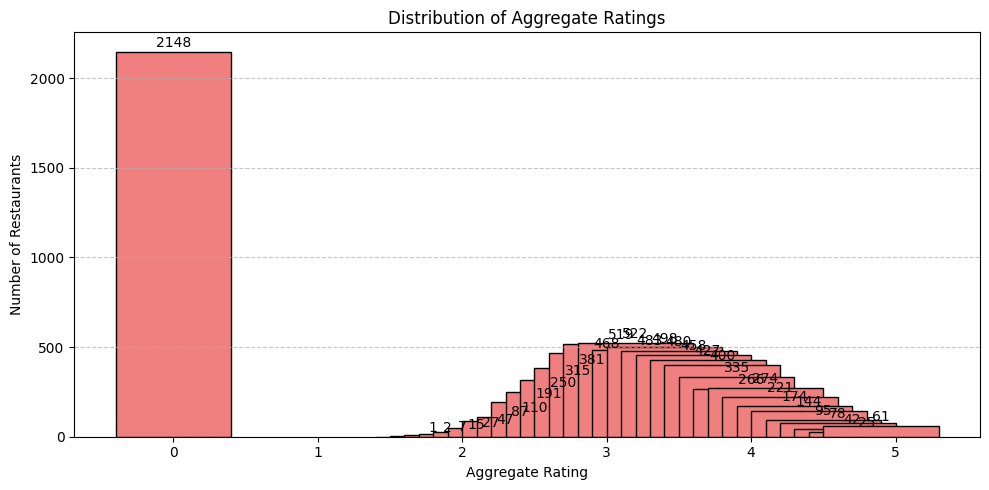

Most common rating: 0.0 (2148 restaurants)
Average number of votes per restaurant: 156.91


In [6]:
import matplotlib.pyplot as plt
# Step 1: Analyze rating distribution
rating_counts = df['Aggregate rating'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 5))
bars = plt.bar(rating_counts.index, rating_counts.values, color='lightcoral', edgecolor='black')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{int(yval)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Step 2: Find the most common rating
most_common_rating = rating_counts.idxmax()
most_common_count = rating_counts.max()
print(f"Most common rating: {most_common_rating} ({most_common_count} restaurants)")

# Step 3: Calculate average number of votes
average_votes = df['Votes'].mean()
print(f"Average number of votes per restaurant: {average_votes:.2f}")


In [7]:
import pandas as pd
from collections import Counter

# Step 1: Clean and standardize cuisine combinations
# Remove rows with missing cuisine data
df = df.dropna(subset=['Cuisines'])

# Normalize: remove extra spaces and sort cuisines alphabetically to treat same combinations equally
df['Cuisine Combo'] = df['Cuisines'].apply(lambda x: ', '.join(sorted([c.strip() for c in x.split(',')])))

# Count the most common cuisine combinations
combo_counts = df['Cuisine Combo'].value_counts()
top_combos = combo_counts.head(10)

print("Top 10 Cuisine Combinations:")
print(top_combos)

# Step 2: Check average rating for each combination
combo_ratings = df.groupby('Cuisine Combo')['Aggregate rating'].mean()

# Merge counts and ratings
combo_summary = pd.DataFrame({
    'Count': combo_counts,
    'Average Rating': combo_ratings
}).dropna()

# Sort by average rating among top combinations
top_combo_summary = combo_summary.loc[top_combos.index].sort_values(by='Average Rating', ascending=False)

print("\nTop Cuisine Combinations with Ratings:")
print(top_combo_summary)


Top 10 Cuisine Combinations:
Cuisine Combo
North Indian                      936
Chinese, North Indian             616
Mughlai, North Indian             394
Fast Food                         354
Chinese                           354
Chinese, Mughlai, North Indian    306
Cafe                              299
Bakery                            218
Bakery, Desserts                  181
Chinese, Fast Food                159
Name: count, dtype: int64

Top Cuisine Combinations with Ratings:
                                Count  Average Rating
Cuisine Combo                                        
Cafe                              299        2.890970
Mughlai, North Indian             394        2.767259
Chinese, Mughlai, North Indian    306        2.619935
Bakery, Desserts                  181        2.375691
Chinese, North Indian             616        2.333442
Fast Food                         354        2.118362
Chinese, Fast Food                159        2.069811
Chinese                  

<ipython-input-7-aa02f8d65ae3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuisine Combo'] = df['Cuisines'].apply(lambda x: ', '.join(sorted([c.strip() for c in x.split(',')])))


In [8]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Drop rows without location data
df_geo = df.dropna(subset=['Longitude', 'Latitude'])

# Create a folium map centered at the median coordinates
m = folium.Map(
    location=[df_geo['Latitude'].median(), df_geo['Longitude'].median()],
    zoom_start=11,
    tiles='CartoDB positron'
)

# Use marker clustering for better visualization
marker_cluster = MarkerCluster().add_to(m)

# Add restaurant locations to the map
for idx, row in df_geo.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} ({row['City']})\nRating: {row['Aggregate rating']}"
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save("restaurant_map.html")
print("Map saved as 'restaurant_map.html'. Open this file in a web browser to view the interactive map.")


Map saved as 'restaurant_map.html'. Open this file in a web browser to view the interactive map.


In [9]:
m.save("restaurant_map.html")
print("Map saved as 'restaurant_map.html'. Open this file in a web browser to view the interactive map.")

Map saved as 'restaurant_map.html'. Open this file in a web browser to view the interactive map.


In [10]:
from google.colab import files
files.download("restaurant_map.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import pandas as pd

# Step 1: Identify chains (restaurant names with multiple entries)
chain_counts = df['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1]

print("Top Restaurant Chains (by number of outlets):")
print(restaurant_chains.head(10))

# Step 2: Analyze ratings and popularity of the chains
# Filter the dataset to include only chains
chains_df = df[df['Restaurant Name'].isin(restaurant_chains.index)]

# Group by restaurant name and calculate average rating and votes
chain_stats = chains_df.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'mean',
    'Restaurant Name': 'count'
}).rename(columns={'Restaurant Name': 'Outlets'})

# Sort by number of outlets
top_chains_stats = chain_stats.sort_values(by='Outlets', ascending=False).head(10)

print("\nTop Chains with Average Ratings and Popularity (Votes):")
print(top_chains_stats)


Top Restaurant Chains (by number of outlets):
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64

Top Chains with Average Ratings and Popularity (Votes):
                  Aggregate rating        Votes  Outlets
Restaurant Name                                         
Cafe Coffee Day           2.419277    29.253012       83
Domino's Pizza            2.740506    84.088608       79
Subway                    2.907937    97.206349       63
Green Chick Chop          2.672549    18.901961       51
McDonald's                3.339583   110.229167       48
Keventers                 2.870588    37.147059       34
Pizza Hut                 3.320000   165.366667       30
Giani                     2.689655    29.448276       29
Baskin Robbins            1.860714    15.285714       2

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Download stopwords if not done
nltk.download('stopwords')

# Make sure there's a review column
if 'Review Text' not in df.columns:
    print("No 'Review Text' column found.")
else:
    # Drop missing reviews
    reviews_df = df.dropna(subset=['Review Text'])

    # Clean review text
    reviews_df['cleaned_review'] = reviews_df['Review Text'].str.lower().str.replace('[^a-z\s]', '', regex=True)

    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    reviews_df['tokens'] = reviews_df['cleaned_review'].apply(lambda x: [word for word in x.split() if word not in stop_words])

    # Flatten all tokens
    all_words = [word for tokens in reviews_df['tokens'] for word in tokens]

    # Count word frequency
    word_freq = pd.Series(all_words).value_counts()

    print("🔹 Most Common Keywords (All Reviews):")
    print(word_freq.head(20))

    # Step 2: Analyze review length
    reviews_df['review_length'] = reviews_df['Review Text'].apply(len)
    avg_length = reviews_df['review_length'].mean()
    print(f"\n🔹 Average Review Length: {avg_length:.2f} characters")

    # Step 3: Relationship between review length and rating
    reviews_df['Aggregate rating'] = pd.to_numeric(reviews_df['Aggregate rating'], errors='coerce')
    plt.figure(figsize=(8, 5))
    plt.scatter(reviews_df['review_length'], reviews_df['Aggregate rating'], alpha=0.4, color='purple')
    plt.title('Review Length vs Rating')
    plt.xlabel('Review Length (characters)')
    plt.ylabel('Aggregate Rating')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


No 'Review Text' column found.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


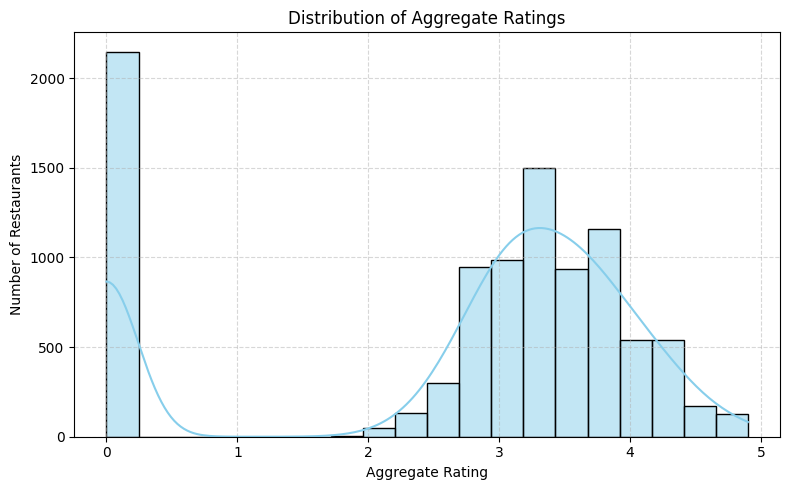

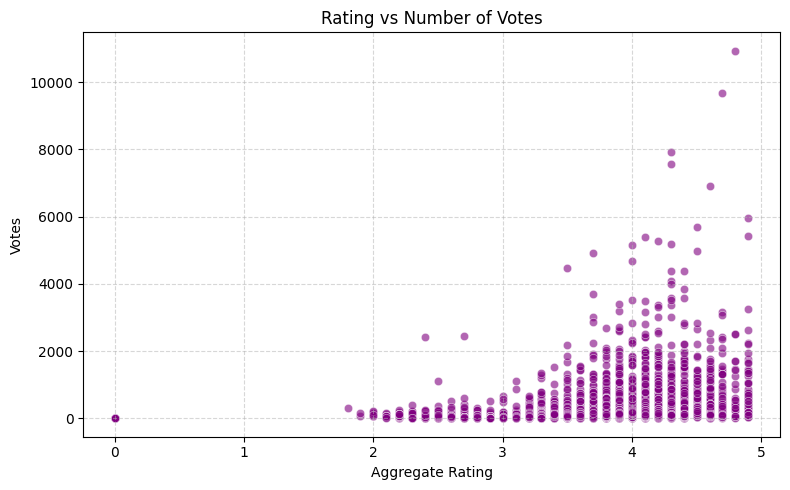

Correlation between rating and votes: 0.31


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing ratings or votes
df = df.dropna(subset=['Aggregate rating', 'Votes'])

# Convert votes to numeric (if not already)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Step 1: Rating distribution (sentiment proxy)
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Step 2: Relationship between rating and number of votes
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Aggregate rating', y='Votes', data=df, alpha=0.6, color='purple')
plt.title('Rating vs Number of Votes')
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Step 3: Correlation value
correlation = df['Aggregate rating'].corr(df['Votes'])
print(f"Correlation between rating and votes: {correlation:.2f}")
